<a href="https://www.kaggle.com/code/mikedelong/python-eda-with-scatterplots?scriptVersionId=139542698" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/exoplanets-planets-outside-our-galaxy/exoplanets.csv',)
df.head()

,Name,Mass (MJ),Radius (RJ),Period (days),Semi-major axis (AU),Temp. (K),Discovery method,Disc. Year,Distance (ly),Host star mass (M☉),Host star temp. (K),Remarks
0,16 Cygni Bb,2.38,NaN,799.5,1.66,NaN,radial vel.,1996.0,68.99,1.04,5750,NaN
1,23 Librae b,1.61,NaN,258.18,0.81,NaN,radial vel.,1999.0,85.46,1.07,5736,NaN
2,47 Ursae Majoris b,2.53,NaN,1078,2.1,NaN,radial vel.,1996.0,45.02,1.08,5892,Proper name Taphao Thong
3,51 Pegasi b,0.46,NaN,4.230785,0.0527,NaN,radial vel.,1995.0,50.45,1.12,5793,Proper name Dimidium; previously informally na...
4,55 Cancri b,0.8306,NaN,14.65152,0.115227,700,radial vel.,1996.0,41.06,0.905,5196,Proper name Galileo


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4855 entries, 0 to 4854
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  4855 non-null   object 
 1   Mass (MJ)             2295 non-null   object 
 2   Radius (RJ)           3700 non-null   object 
 3   Period (days)         4637 non-null   object 
 4   Semi-major axis (AU)  3148 non-null   object 
 5   Temp. (K)             1094 non-null   object 
 6   Discovery method      4855 non-null   object 
 7   Disc. Year            411 non-null    float64
 8   Distance (ly)         4706 non-null   object 
 9   Host star mass (M☉)   4475 non-null   object 
 10  Host star temp. (K)   4513 non-null   object 
 11  Remarks               4502 non-null   object 
dtypes: float64(1), object(11)
memory usage: 455.3+ KB


<Axes: ylabel='Frequency'>

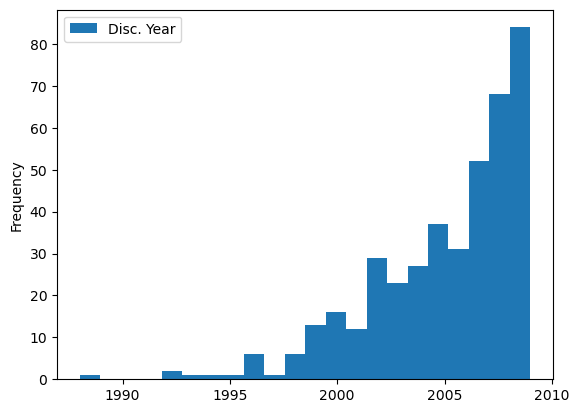

In [3]:
# when were they discovered?
year = 'Disc. Year'
max_year = int(df[year].max())
min_year = int(df[year].min())
df[[year]].plot.hist(bins=1 + max_year - min_year, legend=True)

<Axes: ylabel='Discovery method'>

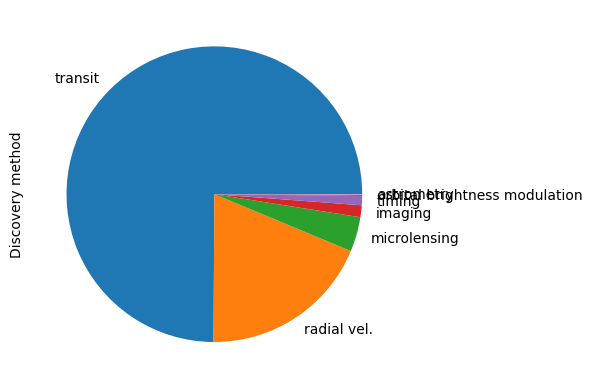

In [4]:
# how were they discovered?
method = 'Discovery method'
df[method].value_counts().plot(kind='pie',)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Disc. Year'>

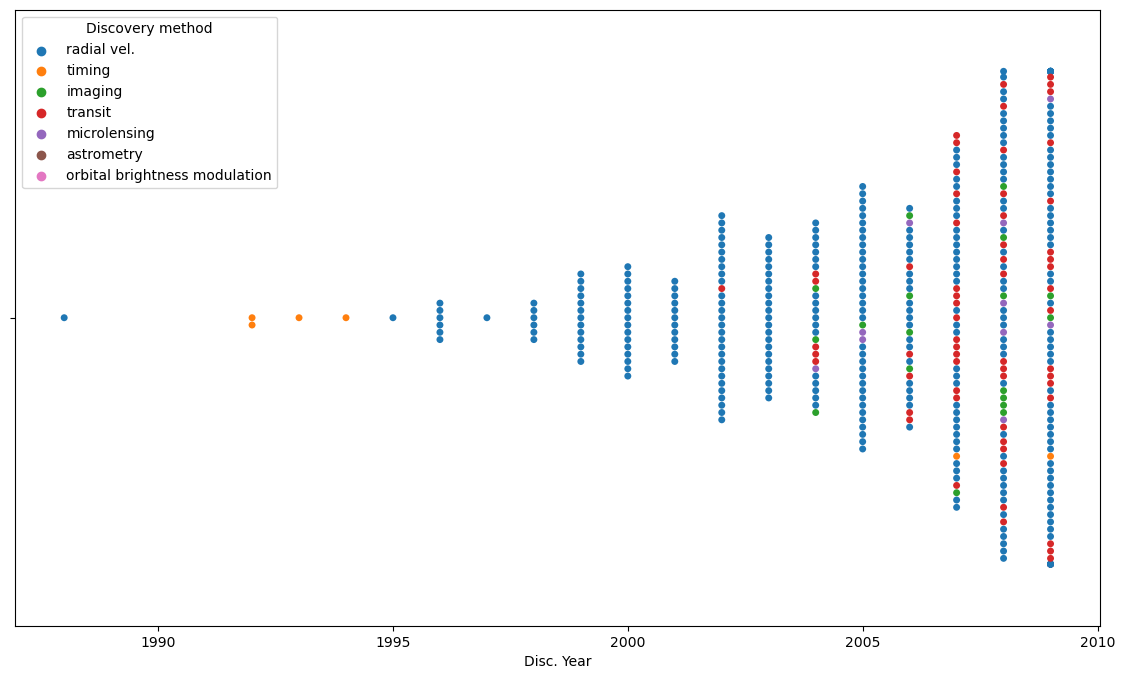

In [5]:
from matplotlib.pyplot import subplots
from seaborn import swarmplot
_, ax = subplots(figsize=(14, 8))
swarmplot(data=df, x=year, hue=method, ax=ax)

<Axes: xlabel='distance (clean)', ylabel='mass (clean)'>

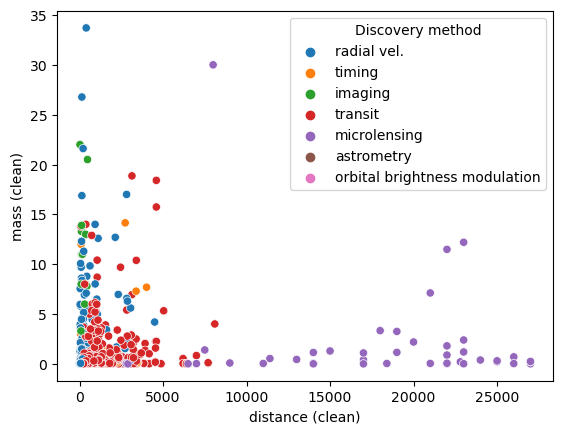

In [6]:
# do we expect to see a correlation between mass and distance?
from numpy import nan
from seaborn import scatterplot

def clean_distance(arg):
    if not isinstance(arg, str):
        return arg
    arg = arg.replace(',', '')
    if '±' in arg:
        pieces = arg.split('±')
        if pieces[0] != '':
            return float(pieces[0])
        else:
            return float(pieces[1])
    

def clean_mass(arg):
    if not isinstance(arg, str):
        return arg
    arg = arg.replace('~', '').replace('{', '').replace(',', '')
    if arg in {'10-May', 'Imaged near Alpha Centauri A'}:
        return nan
    if 'E' in arg:
        return float(arg)
    if '+' in arg:
        return float(arg.split('+')[0])
    if '-' in arg:
        return float(arg.split('-')[0])
    if '±' in arg:
        pieces = arg.split('±')
        if pieces[0] != '':
            return float(pieces[0])
        else:
            return float(pieces[1])
    if '[' in arg:
        return float(arg.split('[')[0])
    if '<' in arg:
        return float(arg.replace('<', ''))
    if '>' in arg:
        return float(arg.split('>')[1])
    if '/' in arg:
        return float(arg.split('/')[0])
    return float(arg)

distance = 'Distance (ly)'
mass = 'Mass (MJ)'
distance_clean = 'distance (clean)'
mass_clean = 'mass (clean)' 
df[distance_clean] = df[distance].apply(func=clean_distance)

df[mass_clean] = df[mass].apply(func=clean_mass)
scatterplot(data=df, x=distance_clean, y=mass_clean, hue=method)

<Axes: xlabel='radius (clean)', ylabel='mass (clean)'>

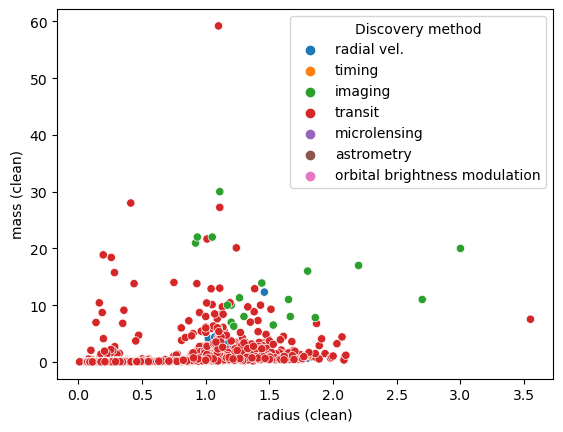

In [7]:
# how about mass vs radius?
radius = 'Radius (RJ)'
radius_clean = 'radius (clean)'
df[radius_clean] = df[radius].apply(func=clean_mass)
scatterplot(data=df, y=mass_clean, x=radius_clean, hue=method)

In [8]:
star_mass = 'Host star mass (M☉)'
star_temp = 'Host star temp. (K)'
star_mass_clean = 'star mass (clean)'
star_temp_clean = 'star temp (clean)'

# yes we're reusing our mass cleaner here

df[star_mass_clean] = df[star_mass].apply(func=clean_mass)
df[star_temp_clean] = df[star_temp].apply(func=clean_mass)

How much non-null data do we have?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4855 entries, 0 to 4854
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  4855 non-null   object 
 1   Mass (MJ)             2295 non-null   object 
 2   Radius (RJ)           3700 non-null   object 
 3   Period (days)         4637 non-null   object 
 4   Semi-major axis (AU)  3148 non-null   object 
 5   Temp. (K)             1094 non-null   object 
 6   Discovery method      4855 non-null   object 
 7   Disc. Year            411 non-null    float64
 8   Distance (ly)         4706 non-null   object 
 9   Host star mass (M☉)   4475 non-null   object 
 10  Host star temp. (K)   4513 non-null   object 
 11  Remarks               4502 non-null   object 
 12  distance (clean)      1783 non-null   float64
 13  mass (clean)          2294 non-null   float64
 14  radius (clean)        3700 non-null   float64
 15  star mass (clean)    

<Axes: xlabel='star mass (clean)', ylabel='star temp (clean)'>

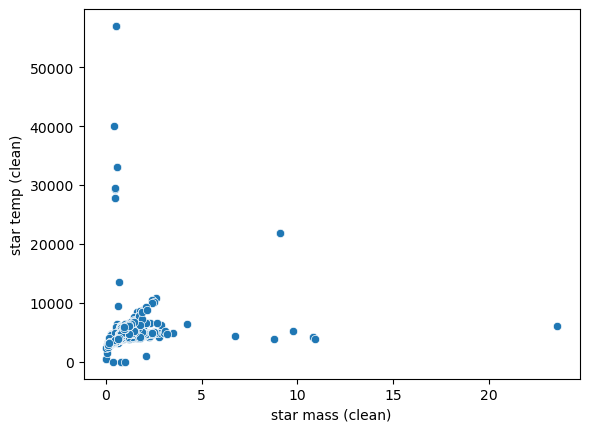

In [10]:
scatterplot(data=df, x=star_mass_clean, y=star_temp_clean, )

Maybe there's some linear correlated data in there, maybe not.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


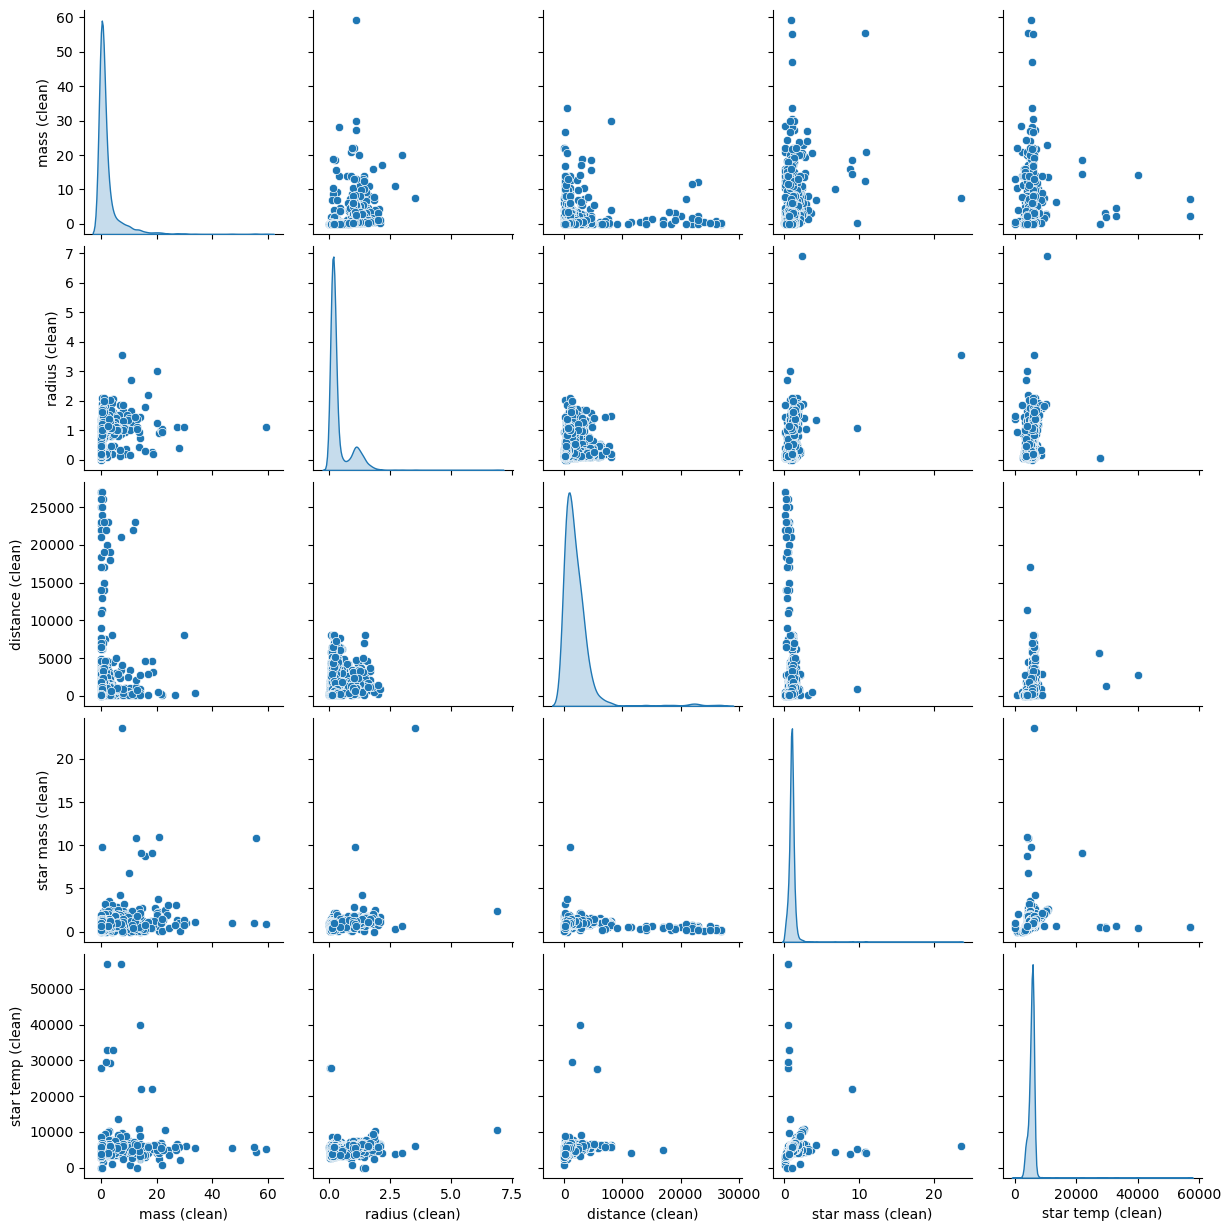

In [11]:
# maybe a pairplot will help
from seaborn import pairplot
pairplot(data=df[[mass_clean, radius_clean, distance_clean, star_mass_clean, star_temp_clean]], diag_kind='kde', )

<Axes: >

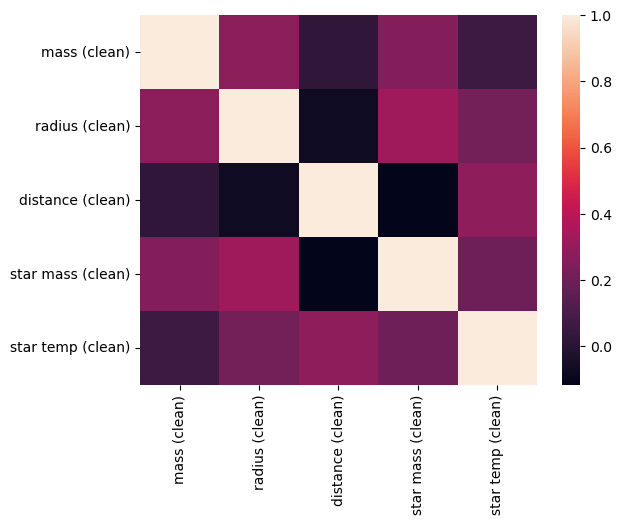

In [12]:
# let's look directly at the correlations
from seaborn import heatmap
heatmap(data=df[[mass_clean, radius_clean, distance_clean, star_mass_clean, star_temp_clean]].corr(), )

Is this data really as uncorrelated as it seems?

In [13]:
df[[mass_clean, radius_clean, distance_clean, star_mass_clean, star_temp_clean]].corr()

,mass (clean),radius (clean),distance (clean),star mass (clean),star temp (clean)
mass (clean),1.000000,0.267611,0.023860,0.256869,0.062971
radius (clean),0.267611,1.000000,-0.075619,0.321605,0.211485
distance (clean),0.023860,-0.075619,1.000000,-0.116754,0.281833
star mass (clean),0.256869,0.321605,-0.116754,1.000000,0.198346
star temp (clean),0.062971,0.211485,0.281833,0.198346,1.000000


Yes.